In [84]:
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [85]:
# Reading CSV file data
h = ['ID number','Clump Thickness','Uniformity of Cell Size', 'Uniformity of Cell Shape', 
            'Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin',
            'Normal Nucleoli', 'Mitoses', 'Class']
df = pd.read_csv("C:/beTulamviec/BreastCancer/breast-cancer-wisconsin.csv", header=None, names= h)
df.head()

,ID number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## Data cleaning

In [86]:
df.isnull().sum()

ID number                      0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [87]:
# More information about the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID number                    699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [88]:
# Notice there is object type in Dtype
df['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [89]:
# Replacing missing data by median value
temp = df.loc[df['Bare Nuclei'] != '?']
df['Bare Nuclei']=df['Bare Nuclei'].replace('?', temp['Bare Nuclei'].median())

In [90]:
df['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', 1.0, '5', '8', '6'],
      dtype=object)

## Take a closer look to the dataframe

<AxesSubplot: xlabel='Class', ylabel='count'>

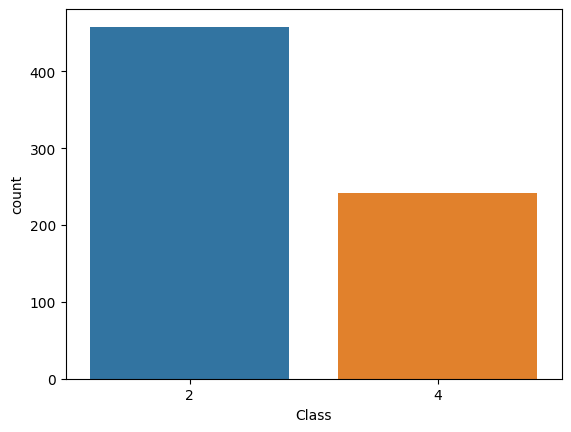

In [91]:
# Checking if the dataset is skewed 
sns.countplot(x = df['Class'])

In [92]:
df.corr()

,ID number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
ID number,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.060051,-0.052072,-0.034901,-0.080226
Clump Thickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.558428,0.535835,0.350034,0.716001
Uniformity of Cell Size,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.755721,0.722865,0.458693,0.817904
Uniformity of Cell Shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.616102,0.628881,0.479101,0.682785
Bland Chromatin,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,1.000000,0.665878,0.344169,0.756616
Normal Nucleoli,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.665878,1.000000,0.428336,0.712244
Mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.344169,0.428336,1.000000,0.423170
Class,-0.080226,0.716001,0.817904,0.818934,0.696800,0.682785,0.756616,0.712244,0.423170,1.000000


<AxesSubplot: xlabel='Uniformity of Cell Size', ylabel='Density'>

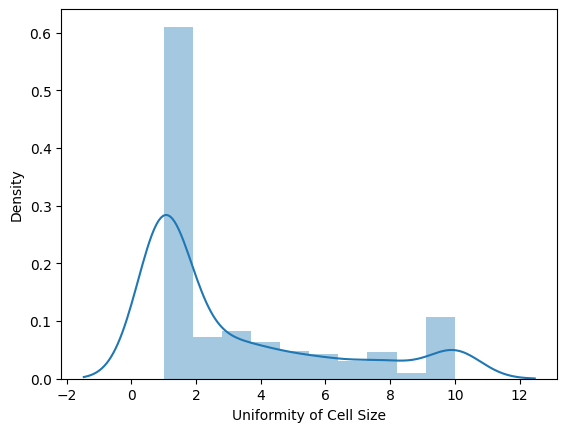

In [93]:
# Checking the distribution 
sns.distplot(df['Uniformity of Cell Size'])

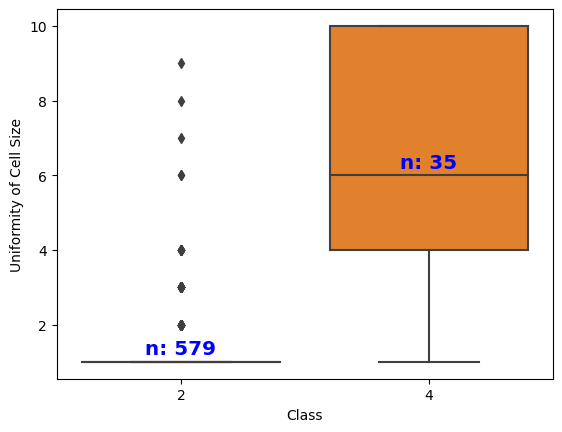

In [94]:
# Analysis for each features
ax= sns.boxplot(x='Class',y="Uniformity of Cell Size",data= df)

# Calculate number of obs per group & median to position labels
#The following codes was adopted from 
# https://www.python-graph-gallery.com/38-show-number-of-observation-on-boxplot
medians = df.groupby(['Class'])['Normal Nucleoli'].median().values
counter = df['Mitoses'].value_counts().values
counter = [str(x) for x in counter.tolist()]
counter = ["n: " + i for i in counter]

pos = range(len(counter))
for tick,label in zip(pos, ax.get_xticklabels()):
    ax.text(pos[tick],
            medians[tick] + 0.2,
            counter[tick],
            horizontalalignment='center',
            size='x-large',
            color='b',
            weight='semibold')

In [95]:
#Checking the number of outliers
def get_num_outliers (column):
 q1 = np.percentile(column, 25)
 q3 = np.percentile(column, 75)
 return sum((column<q1) | (column>q3))
df.groupby('Class').agg([get_num_outliers])

,ID number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses
,get_num_outliers,get_num_outliers,get_num_outliers,get_num_outliers,get_num_outliers,get_num_outliers,get_num_outliers,get_num_outliers,get_num_outliers
Class,,,,,,,,,
2,230,106,78,107,83,95,20,56,13
4,120,31,37,90,111,84,104,47,49


## SVC model for classification tasks

In [96]:
# Since we have a small dataset and an outstanding number of outliers has been detected, 
# we would use SVC model for classification tasks
from sklearn.svm import SVC

#Get target data
y = df['Class']

#Load X variable into a pandas dataframe
x= df.drop(['Class'], axis=1)

from sklearn.model_selection import train_test_split
X = df.drop(columns = ['Class','ID number'])
y = df.Class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

#Build SVM Model
SVM_Model = SVC(gamma=0.1)
SVM_Model.fit(X_train, y_train)
y_pred = SVM_Model.predict(X_test)
score = SVM_Model.score(X_test, y_test)
print('Training Accuracy: ', SVM_Model.score(X_train,y_train))
print('\nTest Accuracy: ',score)

Training Accuracy:  0.9942748091603053

Test Accuracy:  0.9714285714285714
